In [1]:
# GALAH_data is from main catalog (see link Megan sent)
# this has all the targets
# I used the eDR3 designation to xmatch to eDR3
# and then joined with DR3 to save certain columns

# for the GALAH_binaries_catalog,
# I got them all from DR2 and used the dr3.dr2_neighbourhood
# to get dr3 source IDs, but this returned more sources. 
# I don't think there's a way around this.

In [2]:
from astropy.table import Table
KIC_data = Table.read('./kepler_dr3_good.fits', format='fits').to_pandas()

In [3]:
GALAH_data = Table.read('./GALAH_DR3_VAC_GaiaEDR3_v2.fits', format='fits').to_pandas()

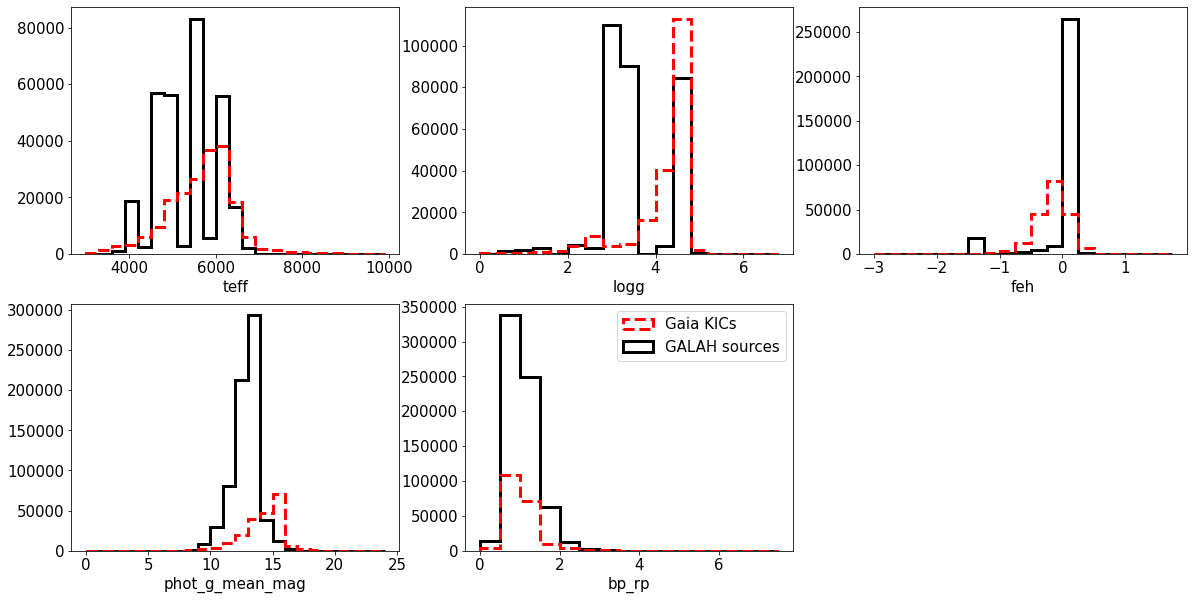

In [4]:
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['font.size']=15
plt.figure(figsize=(20,10))

Teff_bins = np.arange(3000,10000,300)
logg_bins = np.arange(0,7,0.4)
fe_h_bins = np.arange(-3,2,0.25)
gmag_bins = np.arange(0,25,1)
bprp_bins = np.arange(0,8,0.5)

plt.subplot(231)
plt.hist(KIC_data.teff, bins=Teff_bins, 
         histtype='step', ls='--', lw=3, color='r')
plt.hist(GALAH_data.dr2_rv_template_teff, bins=Teff_bins, 
         histtype='step', lw=3, color='k', zorder=0)
plt.xlabel('teff')
plt.subplot(232)
plt.hist(KIC_data.logg, bins=logg_bins, 
         histtype='step', ls='--', lw=3, color='r')
plt.hist(GALAH_data.dr2_rv_template_logg, bins=logg_bins, 
         histtype='step', lw=3, color='k', zorder=0)
plt.xlabel('logg')
plt.subplot(233)
plt.hist(KIC_data.feh, bins=fe_h_bins, 
         histtype='step', ls='--', lw=3, color='r')
plt.hist(GALAH_data.dr2_rv_template_fe_h, bins=fe_h_bins, 
         histtype='step', lw=3, color='k', zorder=0)
plt.xlabel('feh')
plt.subplot(234)
plt.hist(KIC_data.phot_g_mean_mag, bins=gmag_bins, 
         histtype='step', ls='--', lw=3, color='r')
plt.hist(GALAH_data.phot_g_mean_mag, bins=gmag_bins,
         histtype='step', lw=3, color='k', zorder=0)
plt.xlabel('phot_g_mean_mag')

plt.subplot(235)
plt.hist(KIC_data.bp_rp, bins=bprp_bins,
         histtype='step', ls='--', label='Gaia KICs', lw=3, color='r')
plt.hist(GALAH_data.bp_rp, bins=bprp_bins,
         histtype='step', label='GALAH sources', lw=3, color='k', zorder=0)
plt.xlabel('bp_rp');plt.legend()

In [5]:
import astroquery
from astroquery.vizier import Vizier
catalogs = Vizier.find_catalogs('Traven')
catalogs = {k: v for k, v in catalogs.items() if 'J/A+A/638/A145' in k}
Vizier.ROW_LIMIT = -1
catalogs = Vizier.get_catalogs(catalogs.keys())
GALAH_binary_catalog = catalogs[0].to_pandas()

In [6]:
import pandas as pd
targets = pd.read_csv('./GALAH_targets-result.csv')
binaries = pd.read_csv('./GALAH_binaries_dr3-result.csv')

print('Out of',len(targets), 'GALAH targets found in Gaia:')
print(len(targets[targets.has_rvs==True]), ' have RVS spectra')
print(len(targets[targets.non_single_star==1]),' are flagged as non_single_star in Gaia')
print(len(targets[(targets.non_single_star==1) & (targets.has_rvs==True)]),'non_single_stars have RVS')
print('')
print('Out of',len(binaries), 'GALAH binaries found in Gaia:')
print(len(binaries[binaries.has_rvs==True]), ' have RVS spectra')
print(len(binaries[binaries.non_single_star==1]),' are flagged as non_single_star in Gaia')
print(len(binaries[(binaries.non_single_star==1) & (binaries.has_rvs==True)]),'non_single_stars have RVS')

Out of 678312 GALAH targets found in Gaia:
255857  have RVS spectra
15785  are flagged as non_single_star in Gaia
6285 non_single_stars have RVS

Out of 13271 GALAH binaries found in Gaia:
4547  have RVS spectra
463  are flagged as non_single_star in Gaia
194 non_single_stars have RVS


/Users/isabelangelo/opt/anaconda3/lib/python3.8/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/var/folders/pk/t44zjr6913b62d97t1gt20680000gn/T/ipykernel_58363/1739154207.py:5: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  targets.M_G = targets.phot_bp_mean_mag-5*np.log10((1000./targets.parallax)/10.)
/var/folders/pk/t44zjr6913b62d97t1gt20680000gn/T/ipykernel_58363/1739154207.py:6: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  targets.BpmRp = targets.phot_bp_mean_mag-targets.phot_rp_mean_mag
/var/folders/pk/t44zjr6913b62d97t1gt20680000gn/T/ipykernel_58363/1739154207.py:8: UserWarning: Pandas doesn't allow columns to be created via a new attribute name -

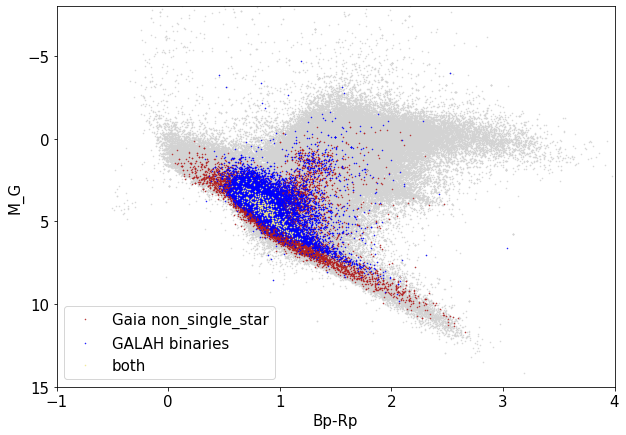

In [7]:
targets_non_single = targets.query('non_single_star == 1')
binaries_non_single = binaries.query('non_single_star == 1')

# add magnitude columns
targets.M_G = targets.phot_bp_mean_mag-5*np.log10((1000./targets.parallax)/10.)
targets.BpmRp = targets.phot_bp_mean_mag-targets.phot_rp_mean_mag

targets_non_single.M_G = targets_non_single.phot_bp_mean_mag-5*np.log10((1000./targets_non_single.parallax)/10.)
targets_non_single.BpmRp = targets_non_single.phot_bp_mean_mag-targets_non_single.phot_rp_mean_mag

binaries.M_G = binaries.phot_bp_mean_mag-5*np.log10((1000./binaries.parallax)/10.)
binaries.BpmRp = binaries.phot_bp_mean_mag-binaries.phot_rp_mean_mag

binaries_non_single.M_G = binaries_non_single.phot_bp_mean_mag-5*np.log10((1000./binaries_non_single.parallax)/10.)
binaries_non_single.BpmRp = binaries_non_single.phot_bp_mean_mag-binaries_non_single.phot_rp_mean_mag

plt.figure(figsize=(10,7))
plt.plot(targets.BpmRp, targets.M_G, '.', color='lightgrey',ms=1)
plt.plot(targets_non_single.BpmRp, targets_non_single.M_G, '.', color='firebrick', 
         label='Gaia non_single_star',ms=1)
plt.plot(binaries.BpmRp, binaries.M_G, '.', color='b', 
         label='GALAH binaries',ms=1)
plt.plot(binaries_non_single.BpmRp, binaries_non_single.M_G, '.', color='khaki', 
         label='both',ms=1)

plt.ylim(15,-8);plt.xlim(-1,4)
plt.xlabel('Bp-Rp');plt.ylabel('M_G')
plt.legend()

/var/folders/pk/t44zjr6913b62d97t1gt20680000gn/T/ipykernel_58363/3573237353.py:8: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  targets_clean.M_G = targets_clean.phot_bp_mean_mag-5*np.log10((1000./targets_clean.parallax)/10.)
/var/folders/pk/t44zjr6913b62d97t1gt20680000gn/T/ipykernel_58363/3573237353.py:9: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  targets_clean.BpmRp = targets_clean.phot_bp_mean_mag-targets_clean.phot_rp_mean_mag
/var/folders/pk/t44zjr6913b62d97t1gt20680000gn/T/ipykernel_58363/3573237353.py:11: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  targets_clean_non_single.M_G = targets_clean_non_single.phot_bp_mean_mag-5*n

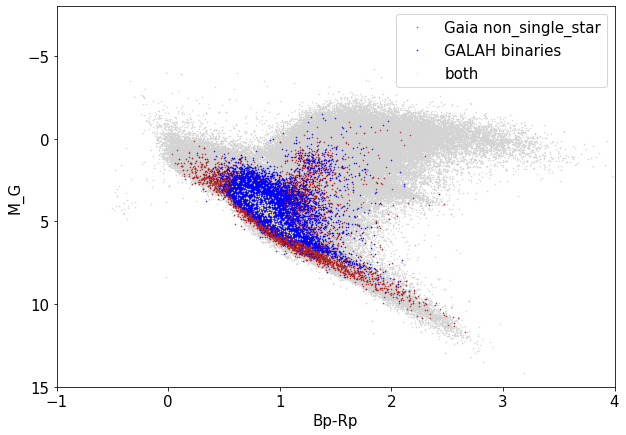

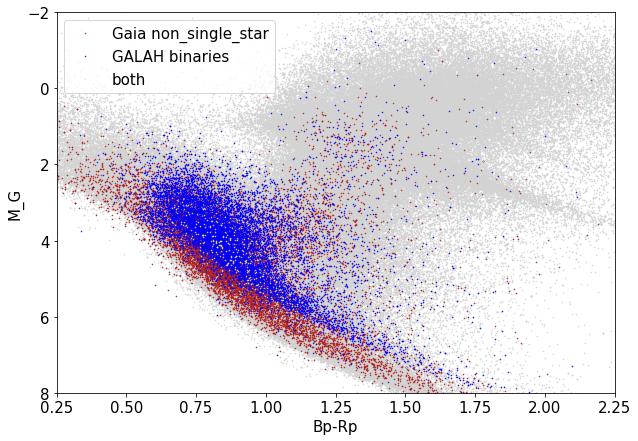

In [8]:
targets_clean = pd.read_csv('./GALAH_targets_cleaned_for_HR-result.csv')
binaries_clean = pd.read_csv('./GALAH_binaries_dr3_cleaned_for_HR-result.csv')

targets_clean_non_single = targets_clean.query('non_single_star == 1')
binaries_clean_non_single = binaries_clean.query('non_single_star == 1')

# add magnitude columns
targets_clean.M_G = targets_clean.phot_bp_mean_mag-5*np.log10((1000./targets_clean.parallax)/10.)
targets_clean.BpmRp = targets_clean.phot_bp_mean_mag-targets_clean.phot_rp_mean_mag

targets_clean_non_single.M_G = targets_clean_non_single.phot_bp_mean_mag-5*np.log10((1000./targets_clean_non_single.parallax)/10.)
targets_clean_non_single.BpmRp = targets_clean_non_single.phot_bp_mean_mag-targets_clean_non_single.phot_rp_mean_mag

binaries_clean.M_G = binaries_clean.phot_bp_mean_mag-5*np.log10((1000./binaries_clean.parallax)/10.)
binaries_clean.BpmRp = binaries_clean.phot_bp_mean_mag-binaries_clean.phot_rp_mean_mag

binaries_clean_non_single.M_G = binaries_clean_non_single.phot_bp_mean_mag-5*np.log10((1000./binaries_clean_non_single.parallax)/10.)
binaries_clean_non_single.BpmRp = binaries_clean_non_single.phot_bp_mean_mag-binaries_clean_non_single.phot_rp_mean_mag

plt.figure(figsize=(10,7))
plt.plot(targets_clean.BpmRp, targets_clean.M_G, '.', color='lightgrey',ms=1)
plt.plot(targets_clean_non_single.BpmRp, targets_clean_non_single.M_G, '.', color='firebrick', 
         label='Gaia non_single_star',ms=1)
plt.plot(binaries_clean.BpmRp, binaries_clean.M_G, '.', color='b', 
         label='GALAH binaries',ms=1)
plt.plot(binaries_clean_non_single.BpmRp, binaries_clean_non_single.M_G, '.', color='khaki', 
         label='both',ms=1)

plt.ylim(15,-8);plt.xlim(-1,4)
plt.xlabel('Bp-Rp');plt.ylabel('M_G')
plt.legend()

plt.figure(figsize=(10,7))
plt.plot(targets_clean.BpmRp, targets_clean.M_G, '.', color='lightgrey',ms=1)
plt.plot(targets_clean_non_single.BpmRp, targets_clean_non_single.M_G, '.', color='firebrick', 
         label='Gaia non_single_star',ms=1)
plt.plot(binaries_clean.BpmRp, binaries_clean.M_G, '.', color='b', 
         label='GALAH binaries',ms=1)
plt.plot(binaries_clean_non_single.BpmRp, binaries_clean_non_single.M_G, '.', color='khaki', 
         label='both',ms=1)

plt.ylim(8,-2);plt.xlim(0.25,2.25)
plt.xlabel('Bp-Rp');plt.ylabel('M_G')
plt.legend()